**Alice Cole Ethan**

Spring 2020

CS 443: Computational Neuroscience

Project 3: Competitive Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from PIL import Image

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 3: Competitive Networks

The objective of this project is to investigate how neural systems process information.

## Task 1) Leaky integrator network (with shunting excitation)

The goal of this task is to implement a leaky integrator network with shunting excitation and analyze how it processes input patterns. The network equation is:

$$\frac{dx_i}{dt} = -Ax_i + (B-x_i)I_i$$

### 1a. Luminance staircase

You will explore the question of whether cells can accurately encode input patterns. One way to measure this is to look at **contrast** or differences between input magnitudes. For example, there is a 2:1 ratio between components in the input vector `[0.2, 0.1]`. Do cells in the network preserve this contrast in their activations or is it distorted? Put differently, do cells preserve spatial separations in input signals?

1. Write code in the cell below to create an increasing luminance staircase pattern that has values going from 0.0 to 0.8 in steps that progressively double (adjacent steps have 2:1 ratio). Have each step of the staircase be length 2. For example: `[0.0, 0.0, 0.05, 0.05, 0.1, ..., 0.8, 0.8]`
2. In `competitive_nets.py`, implement `leaky_integrator` (**run the test code below**) to simulate the staircase input pattern with the leaky integrator network by performing numerical integration. *Note: the test code assumes Euler's method, but you can use Runge-Kutta or other integration methods in all other simulations/functions.* The implementation in `leaky_integrator` requires:
    1. initializing and evaulating the ODE for all cells in the network at each time step.
    2. updating/accumulating the activity according to the derivatives, at each integration time step. Assume that each input value maps 1-to-1 to cells in the network. For example, cell 0 gets input 0.
3. In the cell below, calculate the ratios between successive **input values**. *I suggest ignoring the 1st two values otherwise you'll run into divide by 0 issues*.
4. Calculate the ratios between successive **network activation values**.
5. Create the following three plots below.
    1. **Plot 1:** shows the activity (y axis) of each unit (x axis) at the final time step.
    2. **Plot 2:** shows activity of every other cell (1st, 3rd, 5th, ...) as a function of time step (one curve per cell).
    3. **Plot 3:** shows the difference between the successive input ratios and the successive network activity ratios. It should look like a spiky saw-tooth curve.

Please label the x and y axes, provide a title, and create a legend whenever you are plotting multiple curves in the same plot.

In [2]:
import competitive_nets
stairs = np.array([0.0, 0.0, 0.05, 0.05, 0.1, 0.1, 0.2, 0.2, 0.4, 0.4, 0.8, 0.8])

#### (i) Test leaky_integrator

In [3]:
np.random.seed(0)
test_input = np.random.random(size=(10,))
test_x = competitive_nets.leaky_integrator(test_input, A=1, B=1, t_max=3, dt=0.001)
print(f'Your final unit activations are:\n{test_x[-1]}\nand should be:\n[0.351 0.415 0.373 0.349 0.293 0.39  0.3   0.47  0.489 0.273]')



Your final unit activations are:
[0.351 0.415 0.373 0.349 0.293 0.39  0.3   0.47  0.489 0.273]
and should be:
[0.351 0.415 0.373 0.349 0.293 0.39  0.3   0.47  0.489 0.273]


#### Your luminance staircase simulation

In [4]:
ratios = []
for i in range(2, len(stairs)-1):
    ratios.append(stairs[i]/stairs[i+1])
print(ratios)

last_net_activation_val_ratios = []
all_net_activation_val_ratios = []
net_acts = competitive_nets.leaky_integrator(stairs, A = 1, B=1, t_max = 3, dt = 0.001)
for i in range(2, len(net_acts)-1):
    all_net_activation_val_ratios.append(net_acts[i]/net_acts[i+1])
last_net_acts = net_acts[-1]
for i in range(2, len(last_net_acts)-1):
    last_net_activation_val_ratios.append(last_net_acts[i]/last_net_acts[i+1])
print(last_net_activation_val_ratios)

[1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0]
[1.0, 0.5205680932235908, 1.0, 0.5401031417364519, 1.0, 0.5760487413977297, 1.0, 0.6361128749912655, 1.0]


<ipython-input-4-3c961301bbc2>:10: RuntimeWarning: invalid value encountered in true_divide
  all_net_activation_val_ratios.append(net_acts[i]/net_acts[i+1])


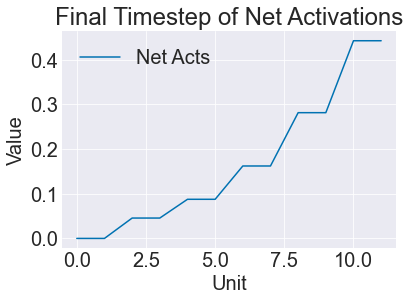

In [5]:
#plot
plt.plot(last_net_acts, label="Net Acts")

#make words show up
plt.legend()
plt.title("Final Timestep of Net Activations")
plt.ylabel("Value")
plt.xlabel("Unit")
plt.show()

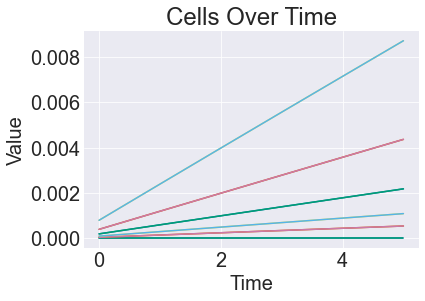

In [6]:
every_other_act = []
for i in range(0, len(last_net_acts), 2):
    every_other_act.append(net_acts[i+1, :])
plt.plot(every_other_act, label="Net Acts")

#make words show up
# plt.legend()
plt.title("Cells Over Time")
plt.ylabel("Value")
plt.xlabel("Time")
plt.show()

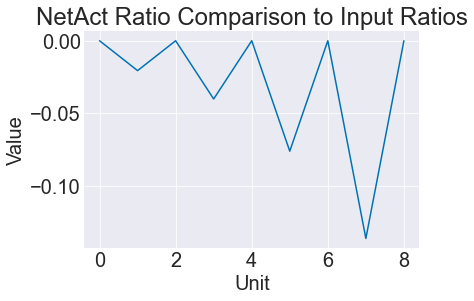

In [7]:
#plot
ratios = np.array(ratios)
last_net_activation_val_ratios = np.array(last_net_activation_val_ratios)

plt.plot(ratios-last_net_activation_val_ratios)
# plt.plot(ratios, label="Input Ratios")

#make words show up
# plt.legend()
plt.title("NetAct Ratio Comparison to Input Ratios")
plt.ylabel("Value")
plt.xlabel("Unit")
plt.show()

**Questions:**

1. Does it look like the network activity has converged to a steady state or would additional simulation time appreciably increase activation values?
2. Interpret the differences in ratios between input and network representations of the pattern. What do the results mean for pattern processing by this network?
3. Following up from 2, how are patterns in weak input signals (i.e. near bottom of staircase) affected compared to strong input signals (i.e. near top of staircase)?

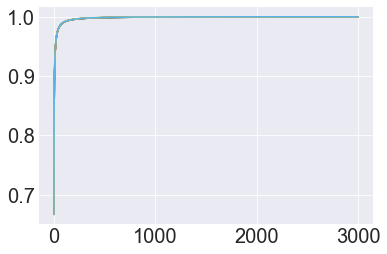

In [8]:
plt.plot(all_net_activation_val_ratios)
plt.show()

**Your answers:**

1. Upon plotting all_net_activation_val_ratios, which is the ratio of the net act values on the previous time step to the net act values on the current time step, we see that the ratio levelled off well before the simulation ended. We could have gotten very similar results with maybe 1/10 of the time. 
2. Fill me in.
3. Fill me in.


### 1b. Varying the luminance staircase gain (dynamic range of processing)

Duplicate your main simulation code from above in the cell below.

In [9]:
giant_steps = np.array([0, 0, 1, 1, 2, 2, 4, 4, 8, 8, 16, 16])

ratios = []
for i in range(2, len(giant_steps)-1):
    ratios.append(giant_steps[i]/giant_steps[i+1])
print(ratios)

last_net_activation_val_ratios = []
all_net_activation_val_ratios = []
net_acts = competitive_nets.leaky_integrator(giant_steps, A = 1, B=1, t_max = 3, dt = 0.001)
for i in range(2, len(net_acts)-1):
    all_net_activation_val_ratios.append(net_acts[i]/net_acts[i+1])
last_net_acts = net_acts[-1]
for i in range(2, len(last_net_acts)-1):
    last_net_activation_val_ratios.append(last_net_acts[i]/last_net_acts[i+1])
print(last_net_activation_val_ratios)

[1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0]
[1.0, 0.7482465944916595, 1.0, 0.8332324222338909, 1.0, 0.8999997361814157, 1.0, 0.944444444442891, 1.0]


<ipython-input-9-52e638422519>:12: RuntimeWarning: invalid value encountered in true_divide
  all_net_activation_val_ratios.append(net_acts[i]/net_acts[i+1])


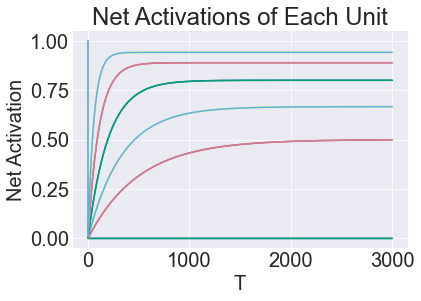

In [10]:
plt.plot(net_acts)
plt.title("Net Activations of Each Unit")
plt.ylabel("Net Activation")
plt.xlabel("T")
plt.show()

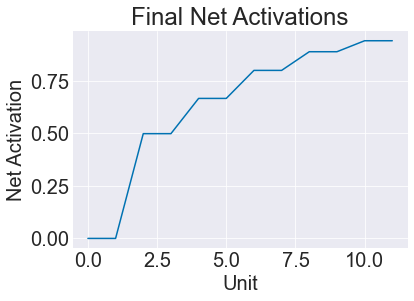

In [11]:
plt.plot(last_net_acts)
plt.title("Final Net Activations")
plt.ylabel("Net Activation")
plt.xlabel("Unit")
plt.show() 

In [13]:
ginormous_steps = stairs * 1000

ratios = []
for i in range(2, len(ginormous_steps)-1):
    ratios.append(ginormous_steps[i]/ginormous_steps[i+1])
print(ratios)

last_net_activation_val_ratios = []
all_net_activation_val_ratios = []
net_acts = competitive_nets.leaky_integrator(ginormous_steps, A = 1, B=1, t_max = 3, dt = 0.001)
for i in range(2, len(net_acts)-1):
    all_net_activation_val_ratios.append(net_acts[i]/net_acts[i+1])
last_net_acts = net_acts[-1]
for i in range(2, len(last_net_acts)-1):
    last_net_activation_val_ratios.append(last_net_acts[i]/last_net_acts[i+1])
print(last_net_activation_val_ratios)

[1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0]
[1.0, 0.9901960784313719, 1.0, 0.9950495049504948, 1.0, 0.9975124378109451, 1.0, 0.9987531172069825, 1.0]


<ipython-input-13-64c1a471df63>:12: RuntimeWarning: invalid value encountered in true_divide
  all_net_activation_val_ratios.append(net_acts[i]/net_acts[i+1])


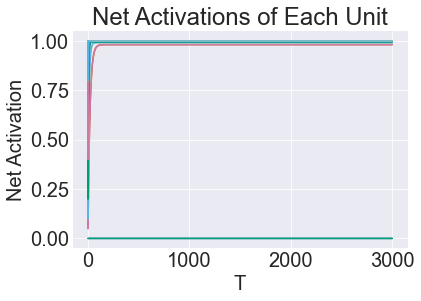

In [14]:
plt.plot(net_acts)
plt.title("Net Activations of Each Unit")
plt.ylabel("Net Activation")
plt.xlabel("T")
plt.show()

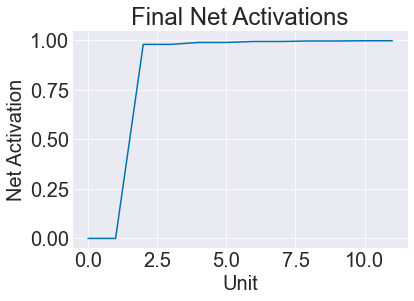

In [15]:
plt.plot(last_net_acts)
plt.title("Final Net Activations")
plt.ylabel("Net Activation")
plt.xlabel("Unit")
plt.show() 

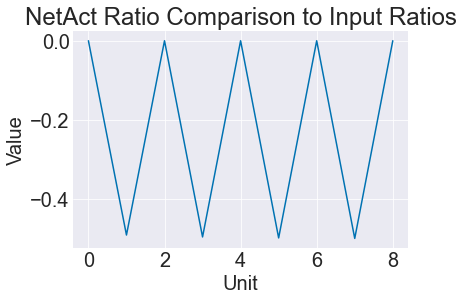

In [16]:
#plot
ratios = np.array(ratios)
last_net_activation_val_ratios = np.array(last_net_activation_val_ratios)

plt.plot(ratios-last_net_activation_val_ratios)
# plt.plot(ratios, label="Input Ratios")

#make words show up
# plt.legend()
plt.title("NetAct Ratio Comparison to Input Ratios")
plt.ylabel("Value")
plt.xlabel("Unit")
plt.show()

**Questions:**

4. If you were to increase the overall **gain** (scale the magnitude) of the entire input signal far above the excitatory upper bound of the cell ($B$), what do you expect would happen to the network activity and the ability to represent the pattern? Test this out by applying a gain so that the staircase ranges from 0 to 16 (in steps that double). Note that 16 >> 1.0 ($B$). Is the result consistent with your expectations ? *Be honest* :)
    1. **Plot 5:** The activation of all network units (y axis) over time (x axis).
    2. **Plot 6:** The final activation (y axis) of each the network unit `i` (x axis).
5. Following up from Q4, print out the ratios between successive input components and the ratios in the activation successive network units.
    - When the signal gain is large, do network units preseve ordinal differences in the input strength? In other words, if neuron $i$ receives a larger input than a neighboring cell $i+1$, is it the case that the neuron $i$ always has a larger activation?
6. What does the outcome from Q4/Q5 suggest about coding of *relative* patterns in biological neurons modeled by the leaky integrator with shunting excitation when signals differ over large dynamic ranges? 
8. Try increasing the signal gain considerably. What do you find with respect to *relative* pattern and ratio preservation and why? Does the staircase look like a staircase? **NOTE:** If your cell activity explodes, this should be because of Euler's method, not the network dynamics. To remedy this, decrease your time step by a factor of 10. For example, $dt$: 0.01 -> 0.001.
    1. **Plot 6:** The difference in successive ratios between inputs and the model neuron activity when the gain is 1000.

**Your answers:**

4. We will face a saturation problem, i.e. all neurons will be very active and we won’t be able to discern the pattern as easily. Plotting the final net acts, it is clear that there is a saturation problem. We can still discern the pattern, but the later units in the network have very similar net activations. This result is somewhat consistent with my expectations, although I was not sure if we would be able to tell them apart at all. 
5. In this case, the network did preserve order, so it seems like it would always preserve order. The math checks out too, as the excitatory term in the network equation is multiplied by the input, so a larger input would lead to a larger net activation.
6. The outcome of 4 and 5 suggests that biological systems preserve the order of input signals, but perhaps not the difference in magnitudes. It suggests that it does not preserve the magnitude because the difference between 0 and 1’s net activation is .5, but the difference between 8 and 16’s net activation is only .052, even though the difference in inputs is 8 times larger. 

7. After running the network on the original luminance staircase with 1000x gain and no change in the time step, all net act values were above .99. After decreasing the time step by a factor of 10, there was no significant difference. I decreased the time step by another factor of 10, but that took too long to run. From this, we can deduce that as the input grows, the pattern becomes less and less clear. This is because the network does not exhibit automatic gain control. The plot of the difference in successive ratios between inputs and neuron activity looks like WW, which is because the ratio of the inputs fluctuates between 0.5 and 1, but the ratio for the net activations is pretty constant at 1, which means that the plot will bounce between -0.5 and 0.



## Task 2) Lateral inhibition

The goal of this task is to explore how lateral inhibition affects neural pattern processing.

### 2a. Staircase revisited

- Implement `sum_not_I(I)` in `competitive_nets.py`. Adapt your `sumNotI(I)` function from Project 0 that takes in an input signal and computes the lateral inhibition (sum of all inputs not equal to the one $\left ( \sum_{j \neq i} I_j \right )$).
- Implement `lateral_inhibition(I, A, B, t_max, dt)` in `competitive_nets.py`. You can use your leaky staircase simulation code above as a starting point. Change the equation to be: $$\frac{dx_i}{dt} = -Ax_i + (B-x_i)I_i - x_i \sum_{j \neq i}I_j$$
- Simulate the model with widely different gains (e.g. 10, 100, 1000, 10000). Remember, if the network activity explodes pathologically, lower your integration time step.

In [22]:
def simulate_lateral_inhibition(gain=1, A=1, B=1, t_max=3, dt=0.001):
    print("\n\nSimulating Lateral Inhibition with gain =", gain)
    stairs = np.array([0.0, 0.0, 0.05, 0.05, 0.1, 0.1, 0.2, 0.2, 0.4, 0.4, 0.8, 0.8]) * gain
    ratios = []
    for i in range(2, len(stairs)-1):
        ratios.append(stairs[i]/stairs[i+1])
    print('staircase ratios', ratios)

    last_net_activation_val_ratios = []
    all_net_activation_val_ratios = []
    net_acts = competitive_nets.lateral_inhibition(stairs, A = A, B=B, t_max = t_max, dt = dt)
    for i in range(2, len(net_acts)-1):
        all_net_activation_val_ratios.append(net_acts[i]/net_acts[i+1])
    last_net_acts = net_acts[-1]
    for i in range(2, len(last_net_acts)-1):
        last_net_activation_val_ratios.append(last_net_acts[i]/last_net_acts[i+1])
    print('net act ratios', last_net_activation_val_ratios)
    return net_acts, last_net_activation_val_ratios

for gain in [1000, 10000]:
    [net_acts, last_net_activation_val_ratios] = simulate_lateral_inhibition(gain=gain)
    



Simulating Lateral Inhibition with gain = 1000
staircase ratios [1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [0.]
not_i: 3000.0
x[:, i]: [0.]
not_i: 3000.0
x[:, i]: [0.]
not_i: 2900.0
x[:, i]: [0.]
not_i: 2900.0
x[:, i]: [0.]
not_i: 2700.0
x[:, i]: [0.]
not_i: 2700.0
x[:, i]: [0.]
not_i: 2300.0
x[:, i]: [0.]
not_i: 2300.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [0.05]
not_i: 3050.0
x[:, i]: [0.05]
not_i: 3000.0
x[:, i]: [0.1]
not_i: 3000.0
x[:, i]: [0.1]
not_i: 2900.0
x[:, i]: [0.2]
not_i: 2900.0
x[:, i]: [0.2]
not_i: 2700.0
x[:, i]: [0.4]
not_i: 2700.0
x[:, i]: [0.4]
not_i: 2300.0
x[:, i]: [0.8]
not_i: 2300.0
x[:, i]: [0.8]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-0.055]
not_i: 3050.0
x[:, i]: [-0.055]
not_i: 3000.0
x[:, i]: [-0.11]
not_i: 3000.0
x[:, i]: [-0.11]
not_i: 2900.0
x[:, i]:

x[:, i]: [1.445e+08]
not_i: 2900.0
x[:, i]: [1.445e+08]
not_i: 2700.0
x[:, i]: [2.89e+08]
not_i: 2700.0
x[:, i]: [2.89e+08]
not_i: 2300.0
x[:, i]: [5.78e+08]
not_i: 2300.0
x[:, i]: [5.78e+08]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-75901404.135]
not_i: 3050.0
x[:, i]: [-75901404.135]
not_i: 3000.0
x[:, i]: [-1.518e+08]
not_i: 3000.0
x[:, i]: [-1.518e+08]
not_i: 2900.0
x[:, i]: [-3.036e+08]
not_i: 2900.0
x[:, i]: [-3.036e+08]
not_i: 2700.0
x[:, i]: [-6.072e+08]
not_i: 2700.0
x[:, i]: [-6.072e+08]
not_i: 2300.0
x[:, i]: [-1.214e+09]
not_i: 2300.0
x[:, i]: [-1.214e+09]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [1.595e+08]
not_i: 3050.0
x[:, i]: [1.595e+08]
not_i: 3000.0
x[:, i]: [3.189e+08]
not_i: 3000.0
x[:, i]: [3.189e+08]
not_i: 2900.0
x[:, i]: [6.379e+08]
not_i: 2900.0
x[:, i]: [6.379e+08]
not_i: 2700.0
x[:, i]: [1.276e+09]
not_i: 2700.0
x[:, i]: [1.276e+09]
not_i: 2300.0
x[:, i]: [2.552e+09]
not_i: 2300.0
x

x[:, i]: [-4.264e+14]
not_i: 3000.0
x[:, i]: [-4.264e+14]
not_i: 2900.0
x[:, i]: [-8.528e+14]
not_i: 2900.0
x[:, i]: [-8.528e+14]
not_i: 2700.0
x[:, i]: [-1.706e+15]
not_i: 2700.0
x[:, i]: [-1.706e+15]
not_i: 2300.0
x[:, i]: [-3.411e+15]
not_i: 2300.0
x[:, i]: [-3.411e+15]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [4.479e+14]
not_i: 3050.0
x[:, i]: [4.479e+14]
not_i: 3000.0
x[:, i]: [8.958e+14]
not_i: 3000.0
x[:, i]: [8.958e+14]
not_i: 2900.0
x[:, i]: [1.792e+15]
not_i: 2900.0
x[:, i]: [1.792e+15]
not_i: 2700.0
x[:, i]: [3.583e+15]
not_i: 2700.0
x[:, i]: [3.583e+15]
not_i: 2300.0
x[:, i]: [7.167e+15]
not_i: 2300.0
x[:, i]: [7.167e+15]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-9.411e+14]
not_i: 3050.0
x[:, i]: [-9.411e+14]
not_i: 3000.0
x[:, i]: [-1.882e+15]
not_i: 3000.0
x[:, i]: [-1.882e+15]
not_i: 2900.0
x[:, i]: [-3.764e+15]
not_i: 2900.0
x[:, i]: [-3.764e+15]
not_i: 2700.0
x[:, i]: [-7.529e+15]
not_i: 2700.

x[:, i]: [-1.955e+25]
not_i: 3050.0
x[:, i]: [-1.955e+25]
not_i: 3000.0
x[:, i]: [-3.911e+25]
not_i: 3000.0
x[:, i]: [-3.911e+25]
not_i: 2900.0
x[:, i]: [-7.822e+25]
not_i: 2900.0
x[:, i]: [-7.822e+25]
not_i: 2700.0
x[:, i]: [-1.564e+26]
not_i: 2700.0
x[:, i]: [-1.564e+26]
not_i: 2300.0
x[:, i]: [-3.129e+26]
not_i: 2300.0
x[:, i]: [-3.129e+26]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [4.108e+25]
not_i: 3050.0
x[:, i]: [4.108e+25]
not_i: 3000.0
x[:, i]: [8.217e+25]
not_i: 3000.0
x[:, i]: [8.217e+25]
not_i: 2900.0
x[:, i]: [1.643e+26]
not_i: 2900.0
x[:, i]: [1.643e+26]
not_i: 2700.0
x[:, i]: [3.287e+26]
not_i: 2700.0
x[:, i]: [3.287e+26]
not_i: 2300.0
x[:, i]: [6.574e+26]
not_i: 2300.0
x[:, i]: [6.574e+26]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-8.632e+25]
not_i: 3050.0
x[:, i]: [-8.632e+25]
not_i: 3000.0
x[:, i]: [-1.726e+26]
not_i: 3000.0
x[:, i]: [-1.726e+26]
not_i: 2900.0
x[:, i]: [-3.453e+26]
not_i: 2900.

x[:, i]: [1.019e+33]
not_i: 3000.0
x[:, i]: [1.019e+33]
not_i: 2900.0
x[:, i]: [2.038e+33]
not_i: 2900.0
x[:, i]: [2.038e+33]
not_i: 2700.0
x[:, i]: [4.075e+33]
not_i: 2700.0
x[:, i]: [4.075e+33]
not_i: 2300.0
x[:, i]: [8.15e+33]
not_i: 2300.0
x[:, i]: [8.15e+33]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-1.07e+33]
not_i: 3050.0
x[:, i]: [-1.07e+33]
not_i: 3000.0
x[:, i]: [-2.14e+33]
not_i: 3000.0
x[:, i]: [-2.14e+33]
not_i: 2900.0
x[:, i]: [-4.281e+33]
not_i: 2900.0
x[:, i]: [-4.281e+33]
not_i: 2700.0
x[:, i]: [-8.562e+33]
not_i: 2700.0
x[:, i]: [-8.562e+33]
not_i: 2300.0
x[:, i]: [-1.712e+34]
not_i: 2300.0
x[:, i]: [-1.712e+34]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [2.249e+33]
not_i: 3050.0
x[:, i]: [2.249e+33]
not_i: 3000.0
x[:, i]: [4.497e+33]
not_i: 3000.0
x[:, i]: [4.497e+33]
not_i: 2900.0
x[:, i]: [8.994e+33]
not_i: 2900.0
x[:, i]: [8.994e+33]
not_i: 2700.0
x[:, i]: [1.799e+34]
not_i: 2700.0
x[:, i]: 

x[:, i]: [-3.927e+44]
not_i: 2900.0
x[:, i]: [-3.927e+44]
not_i: 2700.0
x[:, i]: [-7.853e+44]
not_i: 2700.0
x[:, i]: [-7.853e+44]
not_i: 2300.0
x[:, i]: [-1.571e+45]
not_i: 2300.0
x[:, i]: [-1.571e+45]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [2.062e+44]
not_i: 3050.0
x[:, i]: [2.062e+44]
not_i: 3000.0
x[:, i]: [4.125e+44]
not_i: 3000.0
x[:, i]: [4.125e+44]
not_i: 2900.0
x[:, i]: [8.25e+44]
not_i: 2900.0
x[:, i]: [8.25e+44]
not_i: 2700.0
x[:, i]: [1.65e+45]
not_i: 2700.0
x[:, i]: [1.65e+45]
not_i: 2300.0
x[:, i]: [3.3e+45]
not_i: 2300.0
x[:, i]: [3.3e+45]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-4.333e+44]
not_i: 3050.0
x[:, i]: [-4.333e+44]
not_i: 3000.0
x[:, i]: [-8.667e+44]
not_i: 3000.0
x[:, i]: [-8.667e+44]
not_i: 2900.0
x[:, i]: [-1.733e+45]
not_i: 2900.0
x[:, i]: [-1.733e+45]
not_i: 2700.0
x[:, i]: [-3.467e+45]
not_i: 2700.0
x[:, i]: [-3.467e+45]
not_i: 2300.0
x[:, i]: [-6.933e+45]
not_i: 2300.0
x[:, i

not_i: 2900.0
x[:, i]: [-1.848e+54]
not_i: 2700.0
x[:, i]: [-3.697e+54]
not_i: 2700.0
x[:, i]: [-3.697e+54]
not_i: 2300.0
x[:, i]: [-7.394e+54]
not_i: 2300.0
x[:, i]: [-7.394e+54]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [9.709e+53]
not_i: 3050.0
x[:, i]: [9.709e+53]
not_i: 3000.0
x[:, i]: [1.942e+54]
not_i: 3000.0
x[:, i]: [1.942e+54]
not_i: 2900.0
x[:, i]: [3.884e+54]
not_i: 2900.0
x[:, i]: [3.884e+54]
not_i: 2700.0
x[:, i]: [7.767e+54]
not_i: 2700.0
x[:, i]: [7.767e+54]
not_i: 2300.0
x[:, i]: [1.553e+55]
not_i: 2300.0
x[:, i]: [1.553e+55]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-2.04e+54]
not_i: 3050.0
x[:, i]: [-2.04e+54]
not_i: 3000.0
x[:, i]: [-4.08e+54]
not_i: 3000.0
x[:, i]: [-4.08e+54]
not_i: 2900.0
x[:, i]: [-8.159e+54]
not_i: 2900.0
x[:, i]: [-8.159e+54]
not_i: 2700.0
x[:, i]: [-1.632e+55]
not_i: 2700.0
x[:, i]: [-1.632e+55]
not_i: 2300.0
x[:, i]: [-3.264e+55]
not_i: 2300.0
x[:, i]: [-3.264e+55]
no

x[:, i]: [-1.536e+65]
not_i: 2300.0
x[:, i]: [-1.536e+65]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [2.017e+64]
not_i: 3050.0
x[:, i]: [2.017e+64]
not_i: 3000.0
x[:, i]: [4.035e+64]
not_i: 3000.0
x[:, i]: [4.035e+64]
not_i: 2900.0
x[:, i]: [8.07e+64]
not_i: 2900.0
x[:, i]: [8.07e+64]
not_i: 2700.0
x[:, i]: [1.614e+65]
not_i: 2700.0
x[:, i]: [1.614e+65]
not_i: 2300.0
x[:, i]: [3.228e+65]
not_i: 2300.0
x[:, i]: [3.228e+65]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-4.239e+64]
not_i: 3050.0
x[:, i]: [-4.239e+64]
not_i: 3000.0
x[:, i]: [-8.477e+64]
not_i: 3000.0
x[:, i]: [-8.477e+64]
not_i: 2900.0
x[:, i]: [-1.695e+65]
not_i: 2900.0
x[:, i]: [-1.695e+65]
not_i: 2700.0
x[:, i]: [-3.391e+65]
not_i: 2700.0
x[:, i]: [-3.391e+65]
not_i: 2300.0
x[:, i]: [-6.782e+65]
not_i: 2300.0
x[:, i]: [-6.782e+65]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [8.906e+64]
not_i: 3050.0
x[:, i]: [8.906e+

not_i: 2300.0
x[:, i]: [5.769e+77]
not_i: 2300.0
x[:, i]: [5.769e+77]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-7.576e+76]
not_i: 3050.0
x[:, i]: [-7.576e+76]
not_i: 3000.0
x[:, i]: [-1.515e+77]
not_i: 3000.0
x[:, i]: [-1.515e+77]
not_i: 2900.0
x[:, i]: [-3.03e+77]
not_i: 2900.0
x[:, i]: [-3.03e+77]
not_i: 2700.0
x[:, i]: [-6.061e+77]
not_i: 2700.0
x[:, i]: [-6.061e+77]
not_i: 2300.0
x[:, i]: [-1.212e+78]
not_i: 2300.0
x[:, i]: [-1.212e+78]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [1.592e+77]
not_i: 3050.0
x[:, i]: [1.592e+77]
not_i: 3000.0
x[:, i]: [3.183e+77]
not_i: 3000.0
x[:, i]: [3.183e+77]
not_i: 2900.0
x[:, i]: [6.367e+77]
not_i: 2900.0
x[:, i]: [6.367e+77]
not_i: 2700.0
x[:, i]: [1.273e+78]
not_i: 2700.0
x[:, i]: [1.273e+78]
not_i: 2300.0
x[:, i]: [2.547e+78]
not_i: 2300.0
x[:, i]: [2.547e+78]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-3.344e+77]
not_i: 3050.0
x[:,

not_i: 3000.0
x[:, i]: [6.615e+87]
not_i: 2900.0
x[:, i]: [1.323e+88]
not_i: 2900.0
x[:, i]: [1.323e+88]
not_i: 2700.0
x[:, i]: [2.646e+88]
not_i: 2700.0
x[:, i]: [2.646e+88]
not_i: 2300.0
x[:, i]: [5.292e+88]
not_i: 2300.0
x[:, i]: [5.292e+88]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-6.949e+87]
not_i: 3050.0
x[:, i]: [-6.949e+87]
not_i: 3000.0
x[:, i]: [-1.39e+88]
not_i: 3000.0
x[:, i]: [-1.39e+88]
not_i: 2900.0
x[:, i]: [-2.78e+88]
not_i: 2900.0
x[:, i]: [-2.78e+88]
not_i: 2700.0
x[:, i]: [-5.559e+88]
not_i: 2700.0
x[:, i]: [-5.559e+88]
not_i: 2300.0
x[:, i]: [-1.112e+89]
not_i: 2300.0
x[:, i]: [-1.112e+89]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [1.46e+88]
not_i: 3050.0
x[:, i]: [1.46e+88]
not_i: 3000.0
x[:, i]: [2.92e+88]
not_i: 3000.0
x[:, i]: [2.92e+88]
not_i: 2900.0
x[:, i]: [5.84e+88]
not_i: 2900.0
x[:, i]: [5.84e+88]
not_i: 2700.0
x[:, i]: [1.168e+89]
not_i: 2700.0
x[:, i]: [1.168e+89]
not_i: 2300.0

x[:, i]: [1.557e+97]
not_i: 3050.0
x[:, i]: [1.557e+97]
not_i: 3000.0
x[:, i]: [3.114e+97]
not_i: 3000.0
x[:, i]: [3.114e+97]
not_i: 2900.0
x[:, i]: [6.228e+97]
not_i: 2900.0
x[:, i]: [6.228e+97]
not_i: 2700.0
x[:, i]: [1.246e+98]
not_i: 2700.0
x[:, i]: [1.246e+98]
not_i: 2300.0
x[:, i]: [2.491e+98]
not_i: 2300.0
x[:, i]: [2.491e+98]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-3.271e+97]
not_i: 3050.0
x[:, i]: [-3.271e+97]
not_i: 3000.0
x[:, i]: [-6.542e+97]
not_i: 3000.0
x[:, i]: [-6.542e+97]
not_i: 2900.0
x[:, i]: [-1.308e+98]
not_i: 2900.0
x[:, i]: [-1.308e+98]
not_i: 2700.0
x[:, i]: [-2.617e+98]
not_i: 2700.0
x[:, i]: [-2.617e+98]
not_i: 2300.0
x[:, i]: [-5.234e+98]
not_i: 2300.0
x[:, i]: [-5.234e+98]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [6.873e+97]
not_i: 3050.0
x[:, i]: [6.873e+97]
not_i: 3000.0
x[:, i]: [1.375e+98]
not_i: 3000.0
x[:, i]: [1.375e+98]
not_i: 2900.0
x[:, i]: [2.749e+98]
not_i: 2900.0
x[:

x[:, i]: [4.117e+113]
not_i: 2900.0
x[:, i]: [8.234e+113]
not_i: 2900.0
x[:, i]: [8.234e+113]
not_i: 2700.0
x[:, i]: [1.647e+114]
not_i: 2700.0
x[:, i]: [1.647e+114]
not_i: 2300.0
x[:, i]: [3.294e+114]
not_i: 2300.0
x[:, i]: [3.294e+114]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-4.325e+113]
not_i: 3050.0
x[:, i]: [-4.325e+113]
not_i: 3000.0
x[:, i]: [-8.65e+113]
not_i: 3000.0
x[:, i]: [-8.65e+113]
not_i: 2900.0
x[:, i]: [-1.73e+114]
not_i: 2900.0
x[:, i]: [-1.73e+114]
not_i: 2700.0
x[:, i]: [-3.46e+114]
not_i: 2700.0
x[:, i]: [-3.46e+114]
not_i: 2300.0
x[:, i]: [-6.92e+114]
not_i: 2300.0
x[:, i]: [-6.92e+114]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [9.087e+113]
not_i: 3050.0
x[:, i]: [9.087e+113]
not_i: 3000.0
x[:, i]: [1.817e+114]
not_i: 3000.0
x[:, i]: [1.817e+114]
not_i: 2900.0
x[:, i]: [3.635e+114]
not_i: 2900.0
x[:, i]: [3.635e+114]
not_i: 2700.0
x[:, i]: [7.27e+114]
not_i: 2700.0
x[:, i]: [7.27e+114]
no

x[:, i]: [1.156e+120]
not_i: 2900.0
x[:, i]: [2.313e+120]
not_i: 2900.0
x[:, i]: [2.313e+120]
not_i: 2700.0
x[:, i]: [4.626e+120]
not_i: 2700.0
x[:, i]: [4.626e+120]
not_i: 2300.0
x[:, i]: [9.251e+120]
not_i: 2300.0
x[:, i]: [9.251e+120]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-1.215e+120]
not_i: 3050.0
x[:, i]: [-1.215e+120]
not_i: 3000.0
x[:, i]: [-2.43e+120]
not_i: 3000.0
x[:, i]: [-2.43e+120]
not_i: 2900.0
x[:, i]: [-4.859e+120]
not_i: 2900.0
x[:, i]: [-4.859e+120]
not_i: 2700.0
x[:, i]: [-9.719e+120]
not_i: 2700.0
x[:, i]: [-9.719e+120]
not_i: 2300.0
x[:, i]: [-1.944e+121]
not_i: 2300.0
x[:, i]: [-1.944e+121]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [2.552e+120]
not_i: 3050.0
x[:, i]: [2.552e+120]
not_i: 3000.0
x[:, i]: [5.105e+120]
not_i: 3000.0
x[:, i]: [5.105e+120]
not_i: 2900.0
x[:, i]: [1.021e+121]
not_i: 2900.0
x[:, i]: [1.021e+121]
not_i: 2700.0
x[:, i]: [2.042e+121]
not_i: 2700.0
x[:, i]: [2.042e

not_i: 3000.0
x[:, i]: [-5.87e+128]
not_i: 3000.0
x[:, i]: [-5.87e+128]
not_i: 2900.0
x[:, i]: [-1.174e+129]
not_i: 2900.0
x[:, i]: [-1.174e+129]
not_i: 2700.0
x[:, i]: [-2.348e+129]
not_i: 2700.0
x[:, i]: [-2.348e+129]
not_i: 2300.0
x[:, i]: [-4.696e+129]
not_i: 2300.0
x[:, i]: [-4.696e+129]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [6.166e+128]
not_i: 3050.0
x[:, i]: [6.166e+128]
not_i: 3000.0
x[:, i]: [1.233e+129]
not_i: 3000.0
x[:, i]: [1.233e+129]
not_i: 2900.0
x[:, i]: [2.466e+129]
not_i: 2900.0
x[:, i]: [2.466e+129]
not_i: 2700.0
x[:, i]: [4.933e+129]
not_i: 2700.0
x[:, i]: [4.933e+129]
not_i: 2300.0
x[:, i]: [9.866e+129]
not_i: 2300.0
x[:, i]: [9.866e+129]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-1.296e+129]
not_i: 3050.0
x[:, i]: [-1.296e+129]
not_i: 3000.0
x[:, i]: [-2.591e+129]
not_i: 3000.0
x[:, i]: [-2.591e+129]
not_i: 2900.0
x[:, i]: [-5.182e+129]
not_i: 2900.0
x[:, i]: [-5.182e+129]
not_i: 2700.

not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-3.639e+135]
not_i: 3050.0
x[:, i]: [-3.639e+135]
not_i: 3000.0
x[:, i]: [-7.278e+135]
not_i: 3000.0
x[:, i]: [-7.278e+135]
not_i: 2900.0
x[:, i]: [-1.456e+136]
not_i: 2900.0
x[:, i]: [-1.456e+136]
not_i: 2700.0
x[:, i]: [-2.911e+136]
not_i: 2700.0
x[:, i]: [-2.911e+136]
not_i: 2300.0
x[:, i]: [-5.822e+136]
not_i: 2300.0
x[:, i]: [-5.822e+136]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [7.645e+135]
not_i: 3050.0
x[:, i]: [7.645e+135]
not_i: 3000.0
x[:, i]: [1.529e+136]
not_i: 3000.0
x[:, i]: [1.529e+136]
not_i: 2900.0
x[:, i]: [3.058e+136]
not_i: 2900.0
x[:, i]: [3.058e+136]
not_i: 2700.0
x[:, i]: [6.116e+136]
not_i: 2700.0
x[:, i]: [6.116e+136]
not_i: 2300.0
x[:, i]: [1.223e+137]
not_i: 2300.0
x[:, i]: [1.223e+137]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-1.606e+136]
not_i: 3050.0
x[:, i]: [-1.606e+136]
not_i: 3000.0
x[:, i]: [-3.2

x[:, i]: [3.347e+144]
not_i: 2300.0
x[:, i]: [6.695e+144]
not_i: 2300.0
x[:, i]: [6.695e+144]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-8.791e+143]
not_i: 3050.0
x[:, i]: [-8.791e+143]
not_i: 3000.0
x[:, i]: [-1.758e+144]
not_i: 3000.0
x[:, i]: [-1.758e+144]
not_i: 2900.0
x[:, i]: [-3.516e+144]
not_i: 2900.0
x[:, i]: [-3.516e+144]
not_i: 2700.0
x[:, i]: [-7.033e+144]
not_i: 2700.0
x[:, i]: [-7.033e+144]
not_i: 2300.0
x[:, i]: [-1.407e+145]
not_i: 2300.0
x[:, i]: [-1.407e+145]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [1.847e+144]
not_i: 3050.0
x[:, i]: [1.847e+144]
not_i: 3000.0
x[:, i]: [3.694e+144]
not_i: 3000.0
x[:, i]: [3.694e+144]
not_i: 2900.0
x[:, i]: [7.388e+144]
not_i: 2900.0
x[:, i]: [7.388e+144]
not_i: 2700.0
x[:, i]: [1.478e+145]
not_i: 2700.0
x[:, i]: [1.478e+145]
not_i: 2300.0
x[:, i]: [2.955e+145]
not_i: 2300.0
x[:, i]: [2.955e+145]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3

not_i: 2900.0
x[:, i]: [-4.36e+151]
not_i: 2700.0
x[:, i]: [-8.72e+151]
not_i: 2700.0
x[:, i]: [-8.72e+151]
not_i: 2300.0
x[:, i]: [-1.744e+152]
not_i: 2300.0
x[:, i]: [-1.744e+152]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [2.29e+151]
not_i: 3050.0
x[:, i]: [2.29e+151]
not_i: 3000.0
x[:, i]: [4.58e+151]
not_i: 3000.0
x[:, i]: [4.58e+151]
not_i: 2900.0
x[:, i]: [9.16e+151]
not_i: 2900.0
x[:, i]: [9.16e+151]
not_i: 2700.0
x[:, i]: [1.832e+152]
not_i: 2700.0
x[:, i]: [1.832e+152]
not_i: 2300.0
x[:, i]: [3.664e+152]
not_i: 2300.0
x[:, i]: [3.664e+152]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-4.811e+151]
not_i: 3050.0
x[:, i]: [-4.811e+151]
not_i: 3000.0
x[:, i]: [-9.623e+151]
not_i: 3000.0
x[:, i]: [-9.623e+151]
not_i: 2900.0
x[:, i]: [-1.925e+152]
not_i: 2900.0
x[:, i]: [-1.925e+152]
not_i: 2700.0
x[:, i]: [-3.849e+152]
not_i: 2700.0
x[:, i]: [-3.849e+152]
not_i: 2300.0
x[:, i]: [-7.698e+152]
not_i: 2300.0
x[:, 

x[:, i]: [5.146e+158]
not_i: 2700.0
x[:, i]: [5.146e+158]
not_i: 2300.0
x[:, i]: [1.029e+159]
not_i: 2300.0
x[:, i]: [1.029e+159]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-1.351e+158]
not_i: 3050.0
x[:, i]: [-1.351e+158]
not_i: 3000.0
x[:, i]: [-2.703e+158]
not_i: 3000.0
x[:, i]: [-2.703e+158]
not_i: 2900.0
x[:, i]: [-5.406e+158]
not_i: 2900.0
x[:, i]: [-5.406e+158]
not_i: 2700.0
x[:, i]: [-1.081e+159]
not_i: 2700.0
x[:, i]: [-1.081e+159]
not_i: 2300.0
x[:, i]: [-2.162e+159]
not_i: 2300.0
x[:, i]: [-2.162e+159]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [2.839e+158]
not_i: 3050.0
x[:, i]: [2.839e+158]
not_i: 3000.0
x[:, i]: [5.679e+158]
not_i: 3000.0
x[:, i]: [5.679e+158]
not_i: 2900.0
x[:, i]: [1.136e+159]
not_i: 2900.0
x[:, i]: [1.136e+159]
not_i: 2700.0
x[:, i]: [2.271e+159]
not_i: 2700.0
x[:, i]: [2.271e+159]
not_i: 2300.0
x[:, i]: [4.543e+159]
not_i: 2300.0
x[:, i]: [4.543e+159]
not_i: 3100.0
x[:, i]: [0.]


not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [6.86e+166]
not_i: 3050.0
x[:, i]: [6.86e+166]
not_i: 3000.0
x[:, i]: [1.372e+167]
not_i: 3000.0
x[:, i]: [1.372e+167]
not_i: 2900.0
x[:, i]: [2.744e+167]
not_i: 2900.0
x[:, i]: [2.744e+167]
not_i: 2700.0
x[:, i]: [5.488e+167]
not_i: 2700.0
x[:, i]: [5.488e+167]
not_i: 2300.0
x[:, i]: [1.098e+168]
not_i: 2300.0
x[:, i]: [1.098e+168]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-1.441e+167]
not_i: 3050.0
x[:, i]: [-1.441e+167]
not_i: 3000.0
x[:, i]: [-2.882e+167]
not_i: 3000.0
x[:, i]: [-2.882e+167]
not_i: 2900.0
x[:, i]: [-5.765e+167]
not_i: 2900.0
x[:, i]: [-5.765e+167]
not_i: 2700.0
x[:, i]: [-1.153e+168]
not_i: 2700.0
x[:, i]: [-1.153e+168]
not_i: 2300.0
x[:, i]: [-2.306e+168]
not_i: 2300.0
x[:, i]: [-2.306e+168]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [3.028e+167]
not_i: 3050.0
x[:, i]: [3.028e+167]
not_i: 3000.0
x[:, i]: [6.056e+1

x[:, i]: [-6.31e+175]
not_i: 2300.0
x[:, i]: [-1.262e+176]
not_i: 2300.0
x[:, i]: [-1.262e+176]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [1.657e+175]
not_i: 3050.0
x[:, i]: [1.657e+175]
not_i: 3000.0
x[:, i]: [3.314e+175]
not_i: 3000.0
x[:, i]: [3.314e+175]
not_i: 2900.0
x[:, i]: [6.629e+175]
not_i: 2900.0
x[:, i]: [6.629e+175]
not_i: 2700.0
x[:, i]: [1.326e+176]
not_i: 2700.0
x[:, i]: [1.326e+176]
not_i: 2300.0
x[:, i]: [2.651e+176]
not_i: 2300.0
x[:, i]: [2.651e+176]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-3.482e+175]
not_i: 3050.0
x[:, i]: [-3.482e+175]
not_i: 3000.0
x[:, i]: [-6.963e+175]
not_i: 3000.0
x[:, i]: [-6.963e+175]
not_i: 2900.0
x[:, i]: [-1.393e+176]
not_i: 2900.0
x[:, i]: [-1.393e+176]
not_i: 2700.0
x[:, i]: [-2.785e+176]
not_i: 2700.0
x[:, i]: [-2.785e+176]
not_i: 2300.0
x[:, i]: [-5.571e+176]
not_i: 2300.0
x[:, i]: [-5.571e+176]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i:

not_i: 2700.0
x[:, i]: [-7.824e+182]
not_i: 2300.0
x[:, i]: [-1.565e+183]
not_i: 2300.0
x[:, i]: [-1.565e+183]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [2.055e+182]
not_i: 3050.0
x[:, i]: [2.055e+182]
not_i: 3000.0
x[:, i]: [4.109e+182]
not_i: 3000.0
x[:, i]: [4.109e+182]
not_i: 2900.0
x[:, i]: [8.219e+182]
not_i: 2900.0
x[:, i]: [8.219e+182]
not_i: 2700.0
x[:, i]: [1.644e+183]
not_i: 2700.0
x[:, i]: [1.644e+183]
not_i: 2300.0
x[:, i]: [3.287e+183]
not_i: 2300.0
x[:, i]: [3.287e+183]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-4.317e+182]
not_i: 3050.0
x[:, i]: [-4.317e+182]
not_i: 3000.0
x[:, i]: [-8.634e+182]
not_i: 3000.0
x[:, i]: [-8.634e+182]
not_i: 2900.0
x[:, i]: [-1.727e+183]
not_i: 2900.0
x[:, i]: [-1.727e+183]
not_i: 2700.0
x[:, i]: [-3.454e+183]
not_i: 2700.0
x[:, i]: [-3.454e+183]
not_i: 2300.0
x[:, i]: [-6.907e+183]
not_i: 2300.0
x[:, i]: [-6.907e+183]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, 

not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [4.964e+190]
not_i: 3050.0
x[:, i]: [4.964e+190]
not_i: 3000.0
x[:, i]: [9.928e+190]
not_i: 3000.0
x[:, i]: [9.928e+190]
not_i: 2900.0
x[:, i]: [1.986e+191]
not_i: 2900.0
x[:, i]: [1.986e+191]
not_i: 2700.0
x[:, i]: [3.971e+191]
not_i: 2700.0
x[:, i]: [3.971e+191]
not_i: 2300.0
x[:, i]: [7.942e+191]
not_i: 2300.0
x[:, i]: [7.942e+191]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-1.043e+191]
not_i: 3050.0
x[:, i]: [-1.043e+191]
not_i: 3000.0
x[:, i]: [-2.086e+191]
not_i: 3000.0
x[:, i]: [-2.086e+191]
not_i: 2900.0
x[:, i]: [-4.172e+191]
not_i: 2900.0
x[:, i]: [-4.172e+191]
not_i: 2700.0
x[:, i]: [-8.343e+191]
not_i: 2700.0
x[:, i]: [-8.343e+191]
not_i: 2300.0
x[:, i]: [-1.669e+192]
not_i: 2300.0
x[:, i]: [-1.669e+192]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [2.191e+191]
not_i: 3050.0
x[:, i]: [2.191e+191]
not_i: 3000.0
x[:, i]: [4.382e

not_i: 3000.0
x[:, i]: [5.433e+198]
not_i: 3000.0
x[:, i]: [5.433e+198]
not_i: 2900.0
x[:, i]: [1.087e+199]
not_i: 2900.0
x[:, i]: [1.087e+199]
not_i: 2700.0
x[:, i]: [2.173e+199]
not_i: 2700.0
x[:, i]: [2.173e+199]
not_i: 2300.0
x[:, i]: [4.347e+199]
not_i: 2300.0
x[:, i]: [4.347e+199]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-5.708e+198]
not_i: 3050.0
x[:, i]: [-5.708e+198]
not_i: 3000.0
x[:, i]: [-1.142e+199]
not_i: 3000.0
x[:, i]: [-1.142e+199]
not_i: 2900.0
x[:, i]: [-2.283e+199]
not_i: 2900.0
x[:, i]: [-2.283e+199]
not_i: 2700.0
x[:, i]: [-4.566e+199]
not_i: 2700.0
x[:, i]: [-4.566e+199]
not_i: 2300.0
x[:, i]: [-9.133e+199]
not_i: 2300.0
x[:, i]: [-9.133e+199]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [1.199e+199]
not_i: 3050.0
x[:, i]: [1.199e+199]
not_i: 3000.0
x[:, i]: [2.398e+199]
not_i: 3000.0
x[:, i]: [2.398e+199]
not_i: 2900.0
x[:, i]: [4.797e+199]
not_i: 2900.0
x[:, i]: [4.797e+199]
not_i: 2700.0


x[:, i]: [2.695e+206]
not_i: 2300.0
x[:, i]: [5.389e+206]
not_i: 2300.0
x[:, i]: [5.389e+206]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-7.077e+205]
not_i: 3050.0
x[:, i]: [-7.077e+205]
not_i: 3000.0
x[:, i]: [-1.415e+206]
not_i: 3000.0
x[:, i]: [-1.415e+206]
not_i: 2900.0
x[:, i]: [-2.831e+206]
not_i: 2900.0
x[:, i]: [-2.831e+206]
not_i: 2700.0
x[:, i]: [-5.662e+206]
not_i: 2700.0
x[:, i]: [-5.662e+206]
not_i: 2300.0
x[:, i]: [-1.132e+207]
not_i: 2300.0
x[:, i]: [-1.132e+207]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [1.487e+206]
not_i: 3050.0
x[:, i]: [1.487e+206]
not_i: 3000.0
x[:, i]: [2.974e+206]
not_i: 3000.0
x[:, i]: [2.974e+206]
not_i: 2900.0
x[:, i]: [5.947e+206]
not_i: 2900.0
x[:, i]: [5.947e+206]
not_i: 2700.0
x[:, i]: [1.189e+207]
not_i: 2700.0
x[:, i]: [1.189e+207]
not_i: 2300.0
x[:, i]: [2.379e+207]
not_i: 2300.0
x[:, i]: [2.379e+207]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3

x[:, i]: [-2.233e+219]
not_i: 2700.0
x[:, i]: [-4.467e+219]
not_i: 2700.0
x[:, i]: [-4.467e+219]
not_i: 2300.0
x[:, i]: [-8.933e+219]
not_i: 2300.0
x[:, i]: [-8.933e+219]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [1.173e+219]
not_i: 3050.0
x[:, i]: [1.173e+219]
not_i: 3000.0
x[:, i]: [2.346e+219]
not_i: 3000.0
x[:, i]: [2.346e+219]
not_i: 2900.0
x[:, i]: [4.692e+219]
not_i: 2900.0
x[:, i]: [4.692e+219]
not_i: 2700.0
x[:, i]: [9.384e+219]
not_i: 2700.0
x[:, i]: [9.384e+219]
not_i: 2300.0
x[:, i]: [1.877e+220]
not_i: 2300.0
x[:, i]: [1.877e+220]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-2.465e+219]
not_i: 3050.0
x[:, i]: [-2.465e+219]
not_i: 3000.0
x[:, i]: [-4.929e+219]
not_i: 3000.0
x[:, i]: [-4.929e+219]
not_i: 2900.0
x[:, i]: [-9.858e+219]
not_i: 2900.0
x[:, i]: [-9.858e+219]
not_i: 2700.0
x[:, i]: [-1.972e+220]
not_i: 2700.0
x[:, i]: [-1.972e+220]
not_i: 2300.0
x[:, i]: [-3.943e+220]
not_i: 2300.0
x[:, i]: [

x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-6.922e+225]
not_i: 3050.0
x[:, i]: [-6.922e+225]
not_i: 3000.0
x[:, i]: [-1.384e+226]
not_i: 3000.0
x[:, i]: [-1.384e+226]
not_i: 2900.0
x[:, i]: [-2.769e+226]
not_i: 2900.0
x[:, i]: [-2.769e+226]
not_i: 2700.0
x[:, i]: [-5.538e+226]
not_i: 2700.0
x[:, i]: [-5.538e+226]
not_i: 2300.0
x[:, i]: [-1.108e+227]
not_i: 2300.0
x[:, i]: [-1.108e+227]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [1.454e+226]
not_i: 3050.0
x[:, i]: [1.454e+226]
not_i: 3000.0
x[:, i]: [2.909e+226]
not_i: 3000.0
x[:, i]: [2.909e+226]
not_i: 2900.0
x[:, i]: [5.818e+226]
not_i: 2900.0
x[:, i]: [5.818e+226]
not_i: 2700.0
x[:, i]: [1.164e+227]
not_i: 2700.0
x[:, i]: [1.164e+227]
not_i: 2300.0
x[:, i]: [2.327e+227]
not_i: 2300.0
x[:, i]: [2.327e+227]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-3.056e+226]
not_i: 3050.0
x[:, i]: [-3.056e+226]
not_i: 3000.0
x[:, i]: [-6.111e+226]
not_i: 3000.0
x[:, i]: [-6.111e+2

not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [3.514e+234]
not_i: 3050.0
x[:, i]: [3.514e+234]
not_i: 3000.0
x[:, i]: [7.027e+234]
not_i: 3000.0
x[:, i]: [7.027e+234]
not_i: 2900.0
x[:, i]: [1.405e+235]
not_i: 2900.0
x[:, i]: [1.405e+235]
not_i: 2700.0
x[:, i]: [2.811e+235]
not_i: 2700.0
x[:, i]: [2.811e+235]
not_i: 2300.0
x[:, i]: [5.622e+235]
not_i: 2300.0
x[:, i]: [5.622e+235]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-7.382e+234]
not_i: 3050.0
x[:, i]: [-7.382e+234]
not_i: 3000.0
x[:, i]: [-1.476e+235]
not_i: 3000.0
x[:, i]: [-1.476e+235]
not_i: 2900.0
x[:, i]: [-2.953e+235]
not_i: 2900.0
x[:, i]: [-2.953e+235]
not_i: 2700.0
x[:, i]: [-5.906e+235]
not_i: 2700.0
x[:, i]: [-5.906e+235]
not_i: 2300.0
x[:, i]: [-1.181e+236]
not_i: 2300.0
x[:, i]: [-1.181e+236]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [1.551e+235]
not_i: 3050.0
x[:, i]: [1.551e+235]
not_i: 3000.0
x[:, i]: [3.102e

x[:, i]: [3.077e+243]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-4.04e+242]
not_i: 3050.0
x[:, i]: [-4.04e+242]
not_i: 3000.0
x[:, i]: [-8.081e+242]
not_i: 3000.0
x[:, i]: [-8.081e+242]
not_i: 2900.0
x[:, i]: [-1.616e+243]
not_i: 2900.0
x[:, i]: [-1.616e+243]
not_i: 2700.0
x[:, i]: [-3.232e+243]
not_i: 2700.0
x[:, i]: [-3.232e+243]
not_i: 2300.0
x[:, i]: [-6.465e+243]
not_i: 2300.0
x[:, i]: [-6.465e+243]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [8.489e+242]
not_i: 3050.0
x[:, i]: [8.489e+242]
not_i: 3000.0
x[:, i]: [1.698e+243]
not_i: 3000.0
x[:, i]: [1.698e+243]
not_i: 2900.0
x[:, i]: [3.395e+243]
not_i: 2900.0
x[:, i]: [3.395e+243]
not_i: 2700.0
x[:, i]: [6.791e+243]
not_i: 2700.0
x[:, i]: [6.791e+243]
not_i: 2300.0
x[:, i]: [1.358e+244]
not_i: 2300.0
x[:, i]: [1.358e+244]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-1.783e+243]
not_i: 3050.0
x[:, i]: [-1.783e+243]
not_i: 3

not_i: 3000.0
x[:, i]: [-4.423e+250]
not_i: 3000.0
x[:, i]: [-4.423e+250]
not_i: 2900.0
x[:, i]: [-8.845e+250]
not_i: 2900.0
x[:, i]: [-8.845e+250]
not_i: 2700.0
x[:, i]: [-1.769e+251]
not_i: 2700.0
x[:, i]: [-1.769e+251]
not_i: 2300.0
x[:, i]: [-3.538e+251]
not_i: 2300.0
x[:, i]: [-3.538e+251]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [4.646e+250]
not_i: 3050.0
x[:, i]: [4.646e+250]
not_i: 3000.0
x[:, i]: [9.292e+250]
not_i: 3000.0
x[:, i]: [9.292e+250]
not_i: 2900.0
x[:, i]: [1.858e+251]
not_i: 2900.0
x[:, i]: [1.858e+251]
not_i: 2700.0
x[:, i]: [3.717e+251]
not_i: 2700.0
x[:, i]: [3.717e+251]
not_i: 2300.0
x[:, i]: [7.433e+251]
not_i: 2300.0
x[:, i]: [7.433e+251]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-9.761e+250]
not_i: 3050.0
x[:, i]: [-9.761e+250]
not_i: 3000.0
x[:, i]: [-1.952e+251]
not_i: 3000.0
x[:, i]: [-1.952e+251]
not_i: 2900.0
x[:, i]: [-3.904e+251]
not_i: 2900.0
x[:, i]: [-3.904e+251]
not_i: 270

not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-1.21e+258]
not_i: 3050.0
x[:, i]: [-1.21e+258]
not_i: 3000.0
x[:, i]: [-2.42e+258]
not_i: 3000.0
x[:, i]: [-2.42e+258]
not_i: 2900.0
x[:, i]: [-4.841e+258]
not_i: 2900.0
x[:, i]: [-4.841e+258]
not_i: 2700.0
x[:, i]: [-9.682e+258]
not_i: 2700.0
x[:, i]: [-9.682e+258]
not_i: 2300.0
x[:, i]: [-1.936e+259]
not_i: 2300.0
x[:, i]: [-1.936e+259]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [2.543e+258]
not_i: 3050.0
x[:, i]: [2.543e+258]
not_i: 3000.0
x[:, i]: [5.085e+258]
not_i: 3000.0
x[:, i]: [5.085e+258]
not_i: 2900.0
x[:, i]: [1.017e+259]
not_i: 2900.0
x[:, i]: [1.017e+259]
not_i: 2700.0
x[:, i]: [2.034e+259]
not_i: 2700.0
x[:, i]: [2.034e+259]
not_i: 2300.0
x[:, i]: [4.068e+259]
not_i: 2300.0
x[:, i]: [4.068e+259]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-5.342e+258]
not_i: 3050.0
x[:, i]: [-5.342e+258]
not_i: 3000.0
x[:, i]: [-1.068e+

not_i: 2700.0
x[:, i]: [-1.2e+266]
not_i: 2700.0
x[:, i]: [-1.2e+266]
not_i: 2300.0
x[:, i]: [-2.401e+266]
not_i: 2300.0
x[:, i]: [-2.401e+266]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [3.153e+265]
not_i: 3050.0
x[:, i]: [3.153e+265]
not_i: 3000.0
x[:, i]: [6.305e+265]
not_i: 3000.0
x[:, i]: [6.305e+265]
not_i: 2900.0
x[:, i]: [1.261e+266]
not_i: 2900.0
x[:, i]: [1.261e+266]
not_i: 2700.0
x[:, i]: [2.522e+266]
not_i: 2700.0
x[:, i]: [2.522e+266]
not_i: 2300.0
x[:, i]: [5.044e+266]
not_i: 2300.0
x[:, i]: [5.044e+266]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-6.624e+265]
not_i: 3050.0
x[:, i]: [-6.624e+265]
not_i: 3000.0
x[:, i]: [-1.325e+266]
not_i: 3000.0
x[:, i]: [-1.325e+266]
not_i: 2900.0
x[:, i]: [-2.649e+266]
not_i: 2900.0
x[:, i]: [-2.649e+266]
not_i: 2700.0
x[:, i]: [-5.299e+266]
not_i: 2700.0
x[:, i]: [-5.299e+266]
not_i: 2300.0
x[:, i]: [-1.06e+267]
not_i: 2300.0
x[:, i]: [-1.06e+267]
not_i: 3100.0
x[

not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-1.6e+274]
not_i: 3050.0
x[:, i]: [-1.6e+274]
not_i: 3000.0
x[:, i]: [-3.2e+274]
not_i: 3000.0
x[:, i]: [-3.2e+274]
not_i: 2900.0
x[:, i]: [-6.401e+274]
not_i: 2900.0
x[:, i]: [-6.401e+274]
not_i: 2700.0
x[:, i]: [-1.28e+275]
not_i: 2700.0
x[:, i]: [-1.28e+275]
not_i: 2300.0
x[:, i]: [-2.56e+275]
not_i: 2300.0
x[:, i]: [-2.56e+275]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [3.362e+274]
not_i: 3050.0
x[:, i]: [3.362e+274]
not_i: 3000.0
x[:, i]: [6.724e+274]
not_i: 3000.0
x[:, i]: [6.724e+274]
not_i: 2900.0
x[:, i]: [1.345e+275]
not_i: 2900.0
x[:, i]: [1.345e+275]
not_i: 2700.0
x[:, i]: [2.69e+275]
not_i: 2700.0
x[:, i]: [2.69e+275]
not_i: 2300.0
x[:, i]: [5.379e+275]
not_i: 2300.0
x[:, i]: [5.379e+275]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-7.064e+274]
not_i: 3050.0
x[:, i]: [-7.064e+274]
not_i: 3000.0
x[:, i]: [-1.413e+275]
not_i

x[:, i]: [-1.587e+282]
not_i: 2300.0
x[:, i]: [-3.174e+282]
not_i: 2300.0
x[:, i]: [-3.174e+282]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [4.168e+281]
not_i: 3050.0
x[:, i]: [4.168e+281]
not_i: 3000.0
x[:, i]: [8.337e+281]
not_i: 3000.0
x[:, i]: [8.337e+281]
not_i: 2900.0
x[:, i]: [1.667e+282]
not_i: 2900.0
x[:, i]: [1.667e+282]
not_i: 2700.0
x[:, i]: [3.335e+282]
not_i: 2700.0
x[:, i]: [3.335e+282]
not_i: 2300.0
x[:, i]: [6.669e+282]
not_i: 2300.0
x[:, i]: [6.669e+282]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-8.758e+281]
not_i: 3050.0
x[:, i]: [-8.758e+281]
not_i: 3000.0
x[:, i]: [-1.752e+282]
not_i: 3000.0
x[:, i]: [-1.752e+282]
not_i: 2900.0
x[:, i]: [-3.503e+282]
not_i: 2900.0
x[:, i]: [-3.503e+282]
not_i: 2700.0
x[:, i]: [-7.006e+282]
not_i: 2700.0
x[:, i]: [-7.006e+282]
not_i: 2300.0
x[:, i]: [-1.401e+283]
not_i: 2300.0
x[:, i]: [-1.401e+283]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i

not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-4.793e+289]
not_i: 3050.0
x[:, i]: [-4.793e+289]
not_i: 3000.0
x[:, i]: [-9.586e+289]
not_i: 3000.0
x[:, i]: [-9.586e+289]
not_i: 2900.0
x[:, i]: [-1.917e+290]
not_i: 2900.0
x[:, i]: [-1.917e+290]
not_i: 2700.0
x[:, i]: [-3.835e+290]
not_i: 2700.0
x[:, i]: [-3.835e+290]
not_i: 2300.0
x[:, i]: [-7.669e+290]
not_i: 2300.0
x[:, i]: [-7.669e+290]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [1.007e+290]
not_i: 3050.0
x[:, i]: [1.007e+290]
not_i: 3000.0
x[:, i]: [2.014e+290]
not_i: 3000.0
x[:, i]: [2.014e+290]
not_i: 2900.0
x[:, i]: [4.028e+290]
not_i: 2900.0
x[:, i]: [4.028e+290]
not_i: 2700.0
x[:, i]: [8.056e+290]
not_i: 2700.0
x[:, i]: [8.056e+290]
not_i: 2300.0
x[:, i]: [1.611e+291]
not_i: 2300.0
x[:, i]: [1.611e+291]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-2.116e+290]
not_i: 3050.0
x[:, i]: [-2.116e+290]
not_i: 3000.0
x[:, i]: [-4.232e+290]
not_i: 3000.0
x[:, 

not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [2.829e+296]
not_i: 3050.0
x[:, i]: [2.829e+296]
not_i: 3000.0
x[:, i]: [5.657e+296]
not_i: 3000.0
x[:, i]: [5.657e+296]
not_i: 2900.0
x[:, i]: [1.131e+297]
not_i: 2900.0
x[:, i]: [1.131e+297]
not_i: 2700.0
x[:, i]: [2.263e+297]
not_i: 2700.0
x[:, i]: [2.263e+297]
not_i: 2300.0
x[:, i]: [4.526e+297]
not_i: 2300.0
x[:, i]: [4.526e+297]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [-5.943e+296]
not_i: 3050.0
x[:, i]: [-5.943e+296]
not_i: 3000.0
x[:, i]: [-1.189e+297]
not_i: 3000.0
x[:, i]: [-1.189e+297]
not_i: 2900.0
x[:, i]: [-2.377e+297]
not_i: 2900.0
x[:, i]: [-2.377e+297]
not_i: 2700.0
x[:, i]: [-4.754e+297]
not_i: 2700.0
x[:, i]: [-4.754e+297]
not_i: 2300.0
x[:, i]: [-9.509e+297]
not_i: 2300.0
x[:, i]: [-9.509e+297]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [1.249e+297]
not_i: 3050.0
x[:, i]: [1.249e+297]
not_i: 3000.0
x[:, i]: [2.497e

C:\Users\mynam\onedrive\documents\classes\Computational-Neuroscience\Project3\competitive_nets.py:105: RuntimeWarning: overflow encountered in subtract
  #add change every time
C:\Users\mynam\onedrive\documents\classes\Computational-Neuroscience\Project3\competitive_nets.py:105: RuntimeWarning: overflow encountered in multiply
  #add change every time
C:\Users\mynam\onedrive\documents\classes\Computational-Neuroscience\Project3\competitive_nets.py:107: RuntimeWarning: invalid value encountered in add
  #add the new neurons back to the return every time


[nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0


x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i

not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i

x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i

x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_

not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i

x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i

not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i

x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i

not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i

x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i

x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i

not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i

x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i

not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i

x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i

not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:,

x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i

not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i

not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i

x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i

not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i

x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i

not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i

x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i

x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i

x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i

not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i

x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i

x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i

x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i

not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i

not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i

not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i

x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i

x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i

not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i

x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i

x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2700.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 2300.0
x[:, i]: [nan]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3100.0
x[:, i]: [0.]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3050.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 3000.0
x[:, i]: [nan]
not_i: 2900.0
x[:, i]: [nan]
not_i

KeyboardInterrupt: 

**Questions:**

9. With the wildly different gains on the input signals and constant  value $B$ of 1.0, describe what happens to the a) contrast between adjacent cells' activity levels compared to that in the input pattern and b) the appearance of the staircase.

**Hint:** If everything is working properly, you should get the same result each time.

**Your answers:**

9. Fill me in.


### 2b. Brightness contrast and normalization

Here, you will reproduce the brightness contrast percept with a 1D network.

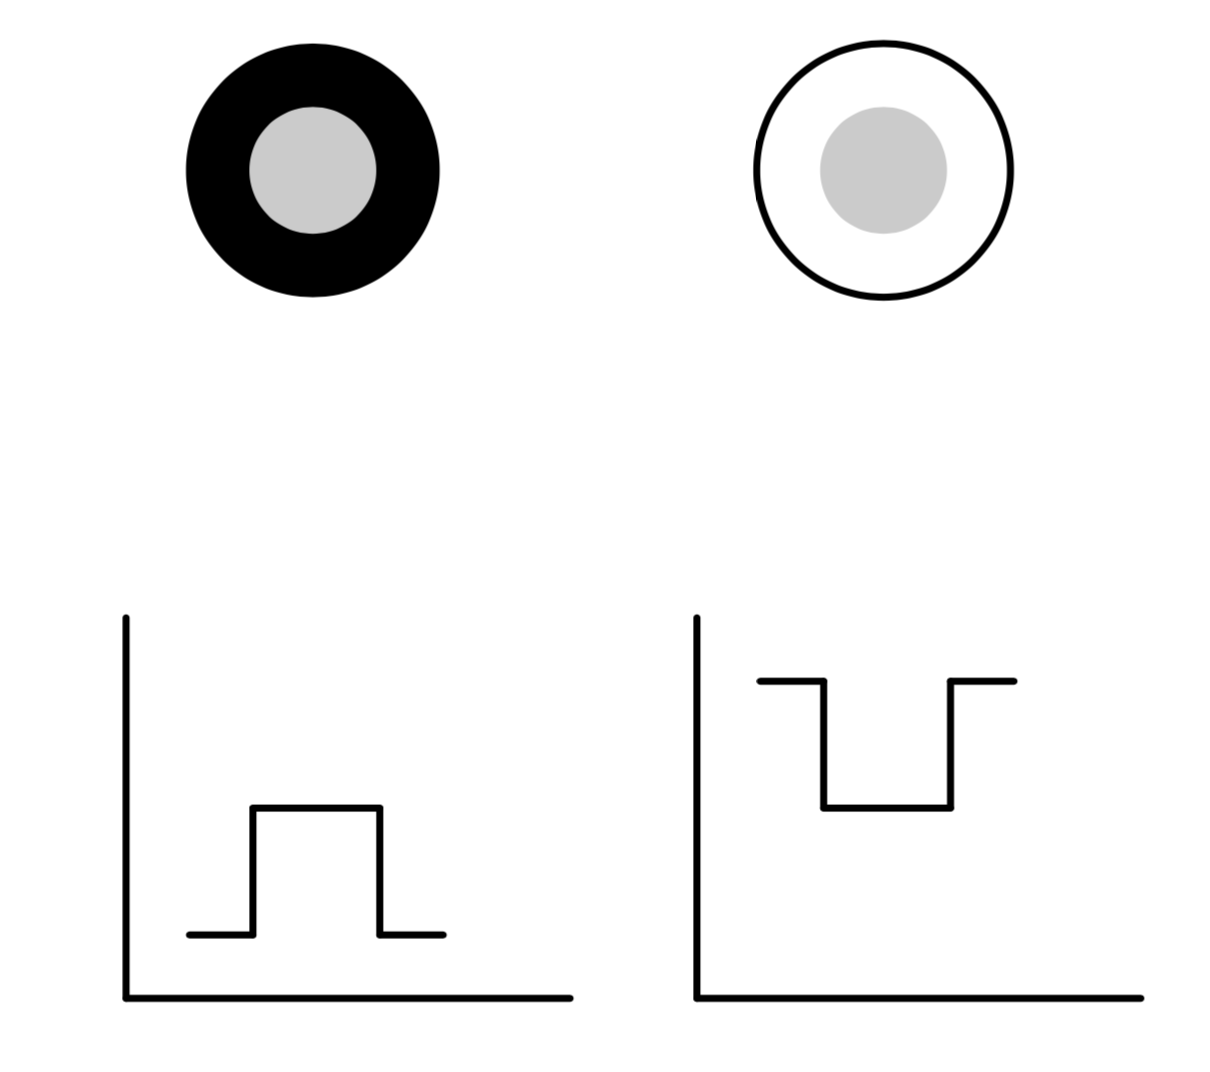

1. In the cell below, write the code to make **the 1D gray disc surrounded by a dark annulus (lower left plot above)**, call `lateral_inhibition`, and plot the input in black and in the same plot show the network activity in blue. **NOTE:** You are just simulating the input depicted in the left column above, not both.
2. Find parameters for `A` and `B` that demonstrate the brightness contrast effect (the center is percieved as brighter than the actual gray) in the plot.
    - You will know if it working by comparing the response to the center gray portion to that generated by the next simulation 3). You are looking for the response center gray region to be greater here than in 3).
3. Write code below to simulate in **1D gray disc surrounded by a lighter annulus (lower right plot in diagram above)**. Note: to increase your chances of getting an obvious effect, make the luminance increment in the lighter surround match the magnitude of the decrement used above relative to the center area. Create a plot in the same format as above showing the effect.
4. Write code below to simulate both annuli above side-by-side in the same network simulation.  Create a plot in the same format as above.

**Questions:**

10. Describe what happened in the simulation of both annuli. Why does the network do this and what does this say for the neural mechanism that gives rises to brightness contrast?

**Your answers:**

10. Fill me in.


## Task 3) Distance-dependent (convolutional) shunting network

The goal of this task is to implement and simulate a distance-dependent shunting network. This is a more realistic model of neurons (wiring isn't free!). You will simulate input patterns that reveal how distance-dependent shunting excitation and inhibition affect pattern processing.

### 3a. Mach bands

- Implement `dist_dep_net(I, A, B, C, e_sigma, i_sigma, kerSz, t_max, dt):`. You will implement the distance-dependent shunting network that has the following form: $$\frac{dx_i}{dt} = -Ax_i + (B-x_i)\sum_{j = 1}^nI_iE_{ij} - (C + x_i) \sum_{j = 1}^nI_iS_{ij}$$
- Test your implementation in the cell below using the staircase input from Task 1. Use $\sigma_E =0.1,  \sigma_S = 3.0$. You should still see the steps of the staircase in the network activity, but with "zig-zags".
    - **Plot** the input in black and in the same plot show the network activity in blue.

**Note:** The above equation is largely the same as the shunting lateral inhibition model from Task 2, except now we perform convolution to obtain the excitatory (E sum) and inhibition (S sum). $\sum_{j = 1}^nI_iE_{ij}$ simply means convolve the (1D) input pattern $I_i$ with the excitatory kernel , where $j$ indices the convolution window (inside the kernel) and $i$ means that the kernel is centered at the same position as the cell $x_i$. As we have discussed, the kernels E and S are usually (1D) Gaussians and $\sigma_E < \sigma_S$.

The above shunting network is also more general than before. We now have a new parameter $C$, which models the inhibitory lower bound of each cell (how suppressed the cell activity can get). One way to think about this is that the lateral inhibition network in Task 2 had the $C$ present, but it was set to 0 (making the cell's activity range from 0 to B). Now the range is from $-C$ to $B$.

### 3b. Brightness contrast revisited

- Simulate the distance-dependent shunting network again on the side-by-side brighness contrast inputs from the last part of Task 2b — find parameters that give outputs consistent with our perception.
    - Hint: From now on, you are now welcome to make $C$ > 0.
- Produce a plot below that encapsulates your findings.

**Questions:**

11. Describe why this simulation of both annuli accounts for the brightness contrast effect. Why does the convolutional network explain the brightness contrast but the "dense" network fails?

**Hint:** Think about normalization.

**Your answers:**

11. Fill me in.


### 3c. Varying input signal gain

- Simulate the distance-dependent network with three "step" inputs, where the upper intensity grows each time, but the baseline lower level remains constant. This should give you intuition how distant-dependent networks process different amounts of contrast in the input pattern (remember: contrast here is defined as the ratio between the intensity values on either side of the step). A picture is shown below. 
    - As a starting point, try parameter values of $A=1, B=C$.
    - Set up the kernel $\sigma$/`kerSz` to perform on-center/off-surround processing. That is, make sure $\sigma_e$ << $\sigma_i$.
        - Put differently, you want to enable the **featural noise suppression** property.
    - Generate three separate inline plots in the cells below, one for each input. Use the same input and network activity coloring scheme as in prior plots.
    - Make sure that the lengths of the lower and upper level of the step are large compared to the length of one unit's receptive field kernels (radius and sigma) — i.e. many units' receptive fields should fall inside each zone of constant intensity.

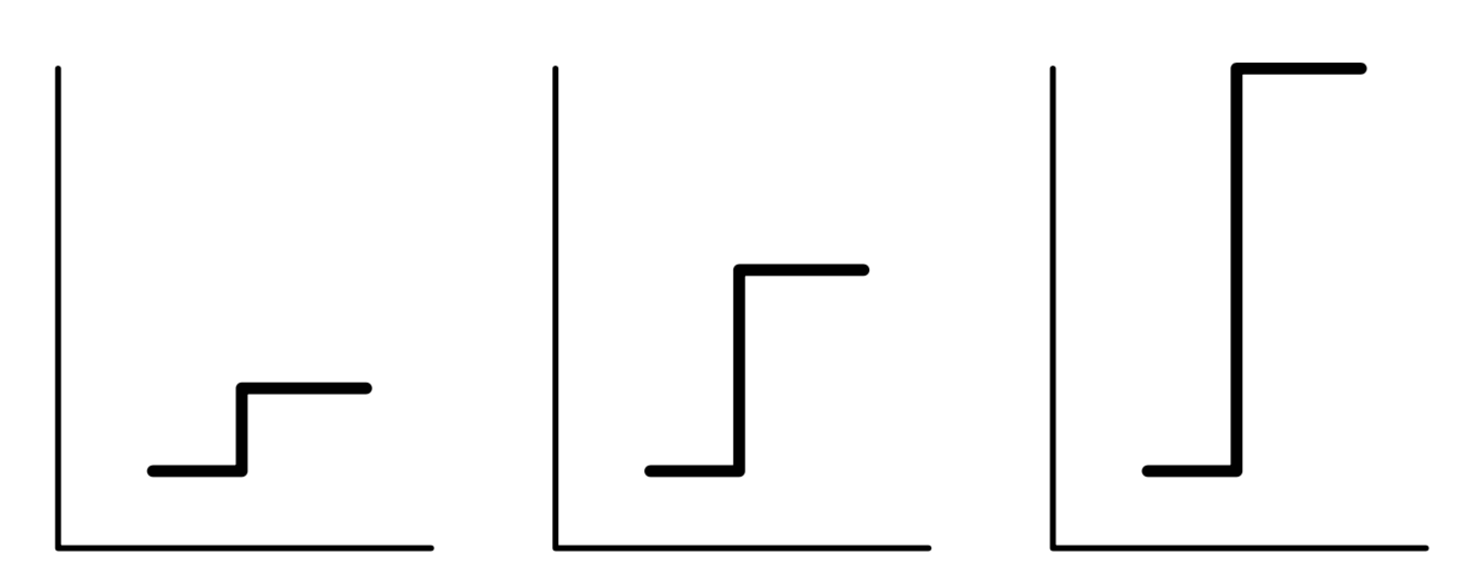

**Questions:**

12. Explain how the network codes different properties of the step (e.g. areas of constant intensity, intensity level, changes in intensity, etc.). Experiment with parameters/input properties to get a better intuition, but turn in code that generates plots consistent to the above guidelines. *Careful with y-axis auto-scaling!*

**Your answers:**

12. Fill me in.


### 3d. Angle expansion illusion

In this subtask, use your distance-dependent network to explain the angle expansion illusion. Here is a summary of the illusion:

> You are shown lines A and B that form an accute angle with one another. You are asked to adjust the angle of another line above A and B (called C) until it looks parallel to B. You stop adjusting C because when it looks parallel to B. *But it will not be!* — Bp (not shown to you) is actually parallel to B. This is called the **angle expansion illusion** because the error tends to be away from A (You set angle AC such that it makes a larger angle than AB).

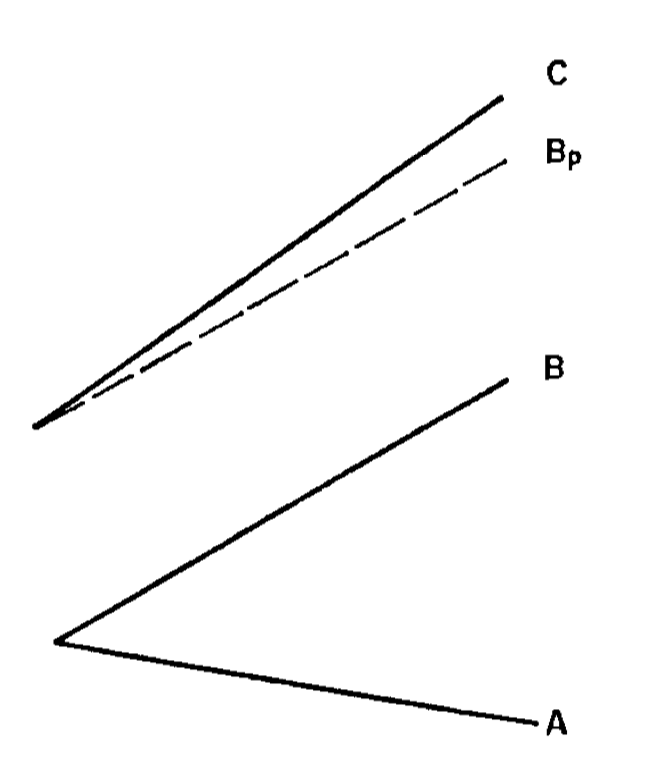

- Your goal is to produce a plot in the cell below that shows evidence that the network is exhibiting the same type of angle estimation error as humans. Assume that the network inputs are "angles between lines" (x-axis is angle, not space, where values are in the range 0 to 360). **Also assume that the angle(s) that generate the highest (peak) activity in the network is the angle that is estimated/perceived (winner-take-all).** The setup should be simple; you're welcome to make the simulation more elaborate as an extension (recurrent activity, processing real lines in 2D space, etc). Here are some suggestions.
    - It might be helpful to represent the orientation of AB and AC as a cluster of several adjacent angles (e.g. wedges rather than narrow spikes in angle space) so that the effect looks "smoother" and "less jumpy". It should "work" either way, though.
    - Start by simulating the network response to a single angle (e.g. AB). Set the network parameter $C$ so that you get inhibitory (< 0) "troughs" surrounding a peak centered on the AB angle. Pay attention to how the activity distribution looks like, especially in relation to the input.
    - Enter the second angle input (AC) into the simulation. **The illusion is strongest in humans for small offsets between the angles (~10 deg)**; you probably will need to change parameters AND/OR the angles of the two inputs to get the effect. Proximity is key.

**Questions:**

13. Briefly explain why your plot accounts for the angle expansion illusion.

**Your answers:**

13. Fill me in.


### 3e. Normalization and image processing

In this subtask, you will apply the distance-dependent shunting network to enhance low contrast images. The human visual system has "layers" of cells that perform distance-dependent shunting inhibition (retina and lateral geniculate nucleus), so this is similar to processing that the early visual system performs.

- Implement `dist_dep_net_image(I, A, i_sigma, kerSz, t_max, dt)`. You will implement a 2D version of the distance-dependent shunting network that has the following form: $$\frac{dx_{ij}}{dt} = -Ax_{ij} + I_{ij} - x_{ij} \sum_{j = 1}^n\sum_{k = 1}^mI_{ij}S_{ijk}$$

Above, $I_{ij}$ indicates the (grayscale) input image at row, col = i, j. The double sum with in the inhibitory term simply indicates 2D convolution with an inhibitory Gaussian ($S_{ijk}$) — there is nothing fundamentally different than 1D convolution. 
- In the cell below, load in one of the provided images, convert it to grayscale, convert the image values (uint8) to float representation (between 0 and 1).
- Next, integrate the shunting network on the image and look at the output image(s) in the cell below. Use subplot or another means to compare the original image and the network response to it.
    - You should be able to achieve significant enhancements to the low night images.
- Play with the parameters `A`, `i_sigma`, `kerSz`. Showcase your best results below.
    - **Simulations are expected to not take more than about 1 minute.** You may wish to resize the images or adjust the time interval over which you integrate network activity if it takes too long to simulate. If resizing and changes to simulation time still don't make simulation times reasonable, as suggested in the docstring, you may solve for the equilibrium solution and use that rather than doing numerical integration.
        - Note that if you decrease integration time, you need to simulate the network long enough for activity to stablize.
    - When plotting, it is useful to know about the `cmap='gray'`.


**Questions:**

14. How do the parameters `A`, `i_sigma`, and `kerSz` affect the output image?
15. What did you learn about how the early visual system processes information?

**Your answers:**

14. Fill me in.
15. Fill me in.


## Task 4) Recurrent neural networks

In all the networks that you have simulated thus far, units are isolated and do not send signals to one another. However, this assumption often is not valid in real neural networks. Cells send **recurrent feedback** to one another: the output of one neuron affects the activity of other neurons. In this task, you will simulate a recurrent network called a **recurrent competitive field (RCF)**. The manner in which the output of neurons affects the activity of other neurons has dramatic effects on the storage of patterns distributed across the network. You will simulate several common cases and visualize the dynamics as they unfold over time.

The goal of this task is to make videos/GIFs/animations of the RCF dynamics with different signal functions. 
You will implement a 1D non-distance-dependent network with different feedback signal functions. The equation is: $$\frac{dx_i}{dt} = -Ax_i + (B-x_i)f(x_i) -x_i\sum_{j \neq i}f(x_j)$$ $$x_i(0) = I_i$$

1. Implement `rcf(I, A, B, fun_str, t_max, dt, F=0)`. Noteably, `fun_str` is the name of the appropriate signal function that you want to use in the network on the current simulation, and `F` is the shape parameter for the slower-than-linear and sigmoid signal functions (more on those in a moment).
2. Implement support for following signal functions (depending on `fun_str`):

Linear: $f(x_i) = x_i$
Faster-than-linear:: $f(x_i) = x_i^2$
Slower-than-linear:: $f(x_i) = \frac{x_i}{F + x_i}$
Sigmoid: $f(x_i) = \frac{x_i^2}{F + x_i^2}$

- Simulate the dynamics of the RCF **after the input signal has been turned off**. Set the initial activity of the RCF at time step 1 to the input pattern (see above equation).
    - I suggest setting $B$ > 1 in network simulations.
    - Since you're going to be making animations, plot the network activity at each timestep of the integration loop. So that the plots update at a smooth framerate, add a short pause after each plot command. 
    - Set the y axis bounds appropriately so that no auto-rescaling happens and network activity remains in view. 
- Create an input pattern in the cell below that resembles the following plot.

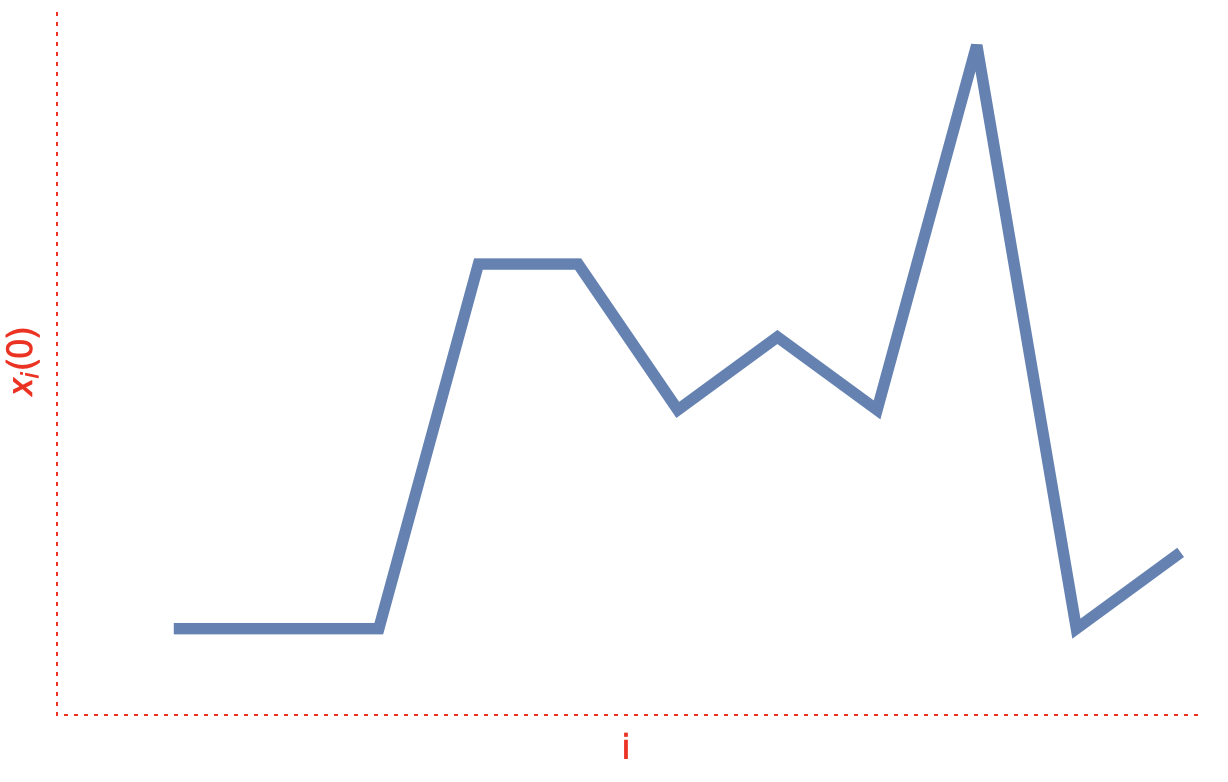

**Simulate your networks below. Make sure that your simulations animations look good!**

### 4a. Animation of linear signal function

Running the cell below should make an animation of the network dynamics of the RCF processing the input with a linear signal function.

### 4b. Animation of faster-than-linear signal function
Running the cell below should make an animation of the network dynamics of the RCF processing the input with a faster-than-linear signal function.

### 4c. Animation of slower-than-linear signal function
Running the cell below should make an animation of the network dynamics of the RCF processing the input with a slower-than-linear signal function.

###  4d. Animation of sigmoid signal function
Running the cell below should make an animation of the network dynamics of the RCF processing the input with a sigmoid signal function. **Your animation should clearly show multiple winners and the fierce competition that they experience to survive!**